In [1]:
import re
import time
import nltk
import requests

In [3]:
!pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=a3b1cbc3da642180a9102ef42c591da9d7119d39b8e27346d68ca68f45e4d5da
  Stored in directory: c:\users\fenne\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from bs4 import BeautifulSoup
from random import randint 
import matplotlib.pyplot as plt 
%matplotlib inline 
from wordcloud import WordCloud

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
import scipy.stats as stats
from scipy.sparse import random as sparse_random
from scipy.sparse import coo_matrix, hstack 

In [6]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.preprocessing import MaxAbsScaler

from sklearn.feature_extraction.text import TfidfVectorizer, \
                                              CountVectorizer
from sklearn.metrics import silhouette_samples, confusion_matrix, \
                      accuracy_score, recall_score, precision_score, \
                      roc_curve, auc, roc_auc_score, confusion_matrix, \
                      classification_report, f1_score, r2_score, \
                      mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD 
from sklearn.linear_model import LinearRegression

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')
stopwords = set(STOPWORDS)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fenne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fenne\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fenne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import sys  
sys.path.insert(0, 'star-trek-script-generator/main/py/')
import Constants

## Defining Constants

In [9]:
all_chars = []

for key in Constants.char_by_series:
    for i in Constants.char_by_series[key]:
        all_chars.append(i)

In [10]:
all_chars = set(all_chars)

In [11]:
char_split = []
for name in all_chars:
    if ' ' in name:
        for i in name.split(' '):
            char_split.append(i.lower())
    else:
         char_split.append(name.lower())

In [12]:
char_split = set(char_split)

In [13]:
not_lines = [
            'act', 'part', 'stage', 'scene', 'camera',
            'pan', 'angle', 'written', 'continued', 'interior', 
            'exterior', 'off', 'exits', 'enters', 'screenplay', 
            'story', 'rick', 'berman', 'gene', 'roddenberry', 
            
]

In [14]:
replacements = {
                "\t"  : " ",
                '...' : ' ',
                '..'  : ' ',
                '\\'  : '' , 
                '--'  : '-',
               }

In [15]:
movies = [
          'https://www.rottentomatoes.com/m/star_trek_into_darkness', 
          'https://www.rottentomatoes.com/m/star_trek_11', 
          'https://www.rottentomatoes.com/m/star_trek_nemesis', 
          'https://www.rottentomatoes.com/m/star_trek_insurrection', 
          'https://www.rottentomatoes.com/m/star_trek_first_contact', 
          'https://www.rottentomatoes.com/m/star_trek_generations', 
          'https://www.rottentomatoes.com/m/star_trek_vi_the_undiscovered_country',
          'https://www.rottentomatoes.com/m/star_trek_v_the_final_frontier', 
          'https://www.rottentomatoes.com/m/star_trek_iv_the_voyage_home', 
          'https://www.rottentomatoes.com/m/star_trek_iii_the_search_for_spock', 
          'https://www.rottentomatoes.com/m/star_trek_ii_the_wrath_of_khan', 
          'https://www.rottentomatoes.com/m/star_trek_the_motion_picture'
           ]

In [16]:
episode = {'' : {
                 1 : 29,
                 2 : 26, 
                 3 : 24
                        },
        '-the-animated-series' : {
                                  1 : 16,
                                  2 : 6
                                        },
        '-the-next-generation' : {
                                  1 : 26,
                                  2 : 22, 
                                  3 : 26,
                                  4 : 26,
                                  5 : 26,
                                  6 : 26, 
                                  7 : 25
                                        },
        '-voyager' : {
                      1 : 16,
                      2 : 26, 
                      3 : 26,
                      4 : 26,
                      5 : 26,
                      6 : 26, 
                      7 : 26
                            },
        '-deep-space-nine' : {
                              1 : 20,
                              2 : 26, 
                              3 : 26,
                              4 : 26,
                              5 : 26,
                              6 : 26, 
                              7 : 26
                                    },
        '-enterprise' : {
                         1 : 26,
                         2 : 26, 
                         3 : 22,
                         4 : 22
                                },
        '_discovery' : {
                        1 : 15,
                        2 : 14, 
                        3 : 13
                                },
        '_picard' : {
                     1 : 10
                                },
        '_lower_decks'  : {
                           1 : 10
                                }}

In [18]:
rep = { 
        'tos' : 1,
        'tas' : 1,
        'tng' : 2,
        'ent' : 3,
        'dsn' : 4,
        'mov' : 5,
        'voy' : 6,
        'dsc' : 7,
        'ld'  : 8,
        'pic' : 9
}

In [19]:
name_dict = { 
          '-' : ' - ',
          " ADI "  :  " ADIRA TAL ",  
          " BRN "  :  " MICHAEL BURNHAM ",
          " BRY "  :  " BRYCE ",
          " BK "   :  " BOOKER ",
          " COMP " :  " COMPUTER ",
          " COS "  :  " COSMO ",
          " DET "  :  " KEYLA DETMER ",
          " GAB "  :  " GABRIELLE BURNHAM ", 
          " GRG "  :  " PHILLIPA GEORGIOU ",
          " GRY "  :  " GREY TAL ",
          " ITH "  :  " ITHOR ",
          " TLR "  :  " TOLOR ", 
          " NIL "  :  " NILSSON ", 
          " OWO "  :  " JOANN OWOSEKUN ",
          " OSS "  :  " OSSYRA ", 
          " POL "  :  " DR.POLLARD ", 
          " RHYS " :  " GEN RHYS ",
          " SAR "  :  " SARU ", 
          " SEN "  :  " SENNA TAL ", 
          " STA "  :  " PAUL STAMETS ", 
          " TLY "  :  " TILLY ", 
          " NDY "  :  " CAPTAIN NDYOE ",
          " XI "   :  ' GAURDIAN TRILL ',
          " PAV "  :  " LEADER TRILL ",
          " VN "   :  " VANCE ",
          " KAR "  :  " CAPTAIN KARDASHEV ", 
          " RA "   :  " CAPTAIN RAHMA ", 
          " BAN "  :  " CAPTAIN BANDRA ", 
          " VK "   :  " V'KIR ",
          " NR "   :  " N'RAJ ",
          " SHR "  :  " SHIRA ",   
          " TR "   :  " T'RINA ",
          " ARL "  :  " AURELLIO ",
          " CR "   :  " CARL ", 
          " ISS HOLO " :  " SUKALS MOM ", 
          " KLY "  :  " KILLY ", 
          " SKL "  :  " SUKAL ", 
          " WL "   :  " LT WILLA ", 
          " OS "   :  " OS'IR  BARTENDER ",
          " ZAR "  :  " ZAREH ", 
          " HLM COMP " : " HELMENT COMPUTER ", 
          " ADM "  :  " ADMIRAL CORNWELL ",
          " ASH "  :  " ASH TYLER ", 
          " PKE "  :  " CHRISTOPHER PIKE ", 
          " SPK "  :  " SPOCK ", 
          " SRK "  :  " SAREK ", 
          " AMD "  :  " AMANDA ", 
          " LRL "  :  " L'RELL ", 
          " LEL "  :  " LELAND ",
          " NUM "  :  " NUMBER ONE ",
          " SIR " :   " SIRANNA ",
          " BRN DAD " : " BURNHAMS DAD ", 
          " CTRL " : " CONTROL ",
          " VIK "  :  " TENAVIK ",
          " KAM "  :  " KAMARAN GANT ",
          " CONN " :  " EVAN CONNOLLY ",
          " GAR "  :  " GARRISON ", 
          " TAL "  : " TALOS MAN ", 
          " TLSN " : " TALOSIAN ", 
          " PSY "  : " PYSCH ", 
          " SEC ONE " : "FIRST GAURD ", 
          " SEC TWO " : "SECOND GAURD ",
          " THR TRANS " :  " SECTION THIRTY-ONE TRANSPORTER ", 
          " ARIM " :  " AIRIAM ",
          " HUS " : " AIRIAM HUSBAND ",
          " PAT "  :  " PATAR ", 
          " ANDO"  : " ANDORAIN ADMIRAL ",
          " TEL "  :  " TELLARITE ADMIRAL ", 
          " KOL "  :  " KOL-SHA ",
          " UJI "  :  " UJILI MO'KAI ", 
          " CUL HOLO " : " HOLOGRAPHIC HUGH CULBER ", 
          " JL "  :  " PICARD ", 
          " FI "  :  " RAFFI ",
          " AGN " :  " ANGES ",
          " HG "  :  " HUGH ", 
          " SVN " :  " SEVEN ", 
          " ICH " :  " ICHEB ",
          " NRK " :  " NAREK ", 
          " SJ "  :  " SOJI ",
          " NRS " :  " NARISSA ", 
          " RK "  :  " WILL RIKER ", 
          " TR "  :  " DEANNA TROI ", 
          " EM "  :  " EMIL ", 
          " EN "  :  " EMERGENCY NAVIGATIONAL ",
          " EH "  :  " EMERGENCY HOSPITALITY ",
          " EMM " :  " EMMOT ", "'re"  : ' are', 
          " AR " :   "ARCANA ", "'ve" : " have",
          " ALT " :  "ALTON SOONG ", "'nt" : " not ",
          " ST "  :  " SUTRA ",  "'ll":' will',
          " CL "  :  " ADMIRAL CLANCY ",
          "QUARK'S": "QUARKS",
          "'S" : '', ':' : '', ';' : '',
          "'" : '', ' BILL ': 'BILLUPS',
          ' MAR ' : ' BECKETT MARINER ', 
          ' RUTH ' : ' RUTHERFORD ',
          ' V CAP ' : ' VANCOUVER CAPTAIN ',
          ' CAP ' : 'CAPTAIN CAROL FREEMAN',
          ' RAN ' : ' JACK RANSOM',
          ' TEN ' : ' DVANA TENDI ',
          ' SHAX ' : 'SHAXS', 
          ' PHAMP ' : ' PEANUT HAMPER ',
          ' BARB ' : ' BARBARA BRINSON ',
          ' DOC ' : ' RON DOCENT ', 
          ' BOIM ': 'BOIMLER',
          ' MIXTUS CIT' : ' MIXTUS CITIZEN', 
          ' AMI ' : ' CAPTAIN AMINA ', 
          ' DUR ' : ' DURGAN ', 
          ' DIV ' : ' SPECIALIST DIVISION 14',
          ' PRA ' : ' PRACHETT ',
          ' WAR ' : ' WARREN ',
          ' HALF ' : ' HALF-OLD HALF-YOUNG ',
          ' INT.' : ' INTERIOR ', 
          ' LT.' : ' LIEUTENANT ',
          ' LT ' : ' LIEUTENANT ',
          ' CMR.' : ' COMMANDER ',
          ' CMR ' : ' COMMANDER ',
          ' POL ' : ' DOCTOR POLLARD ',
          ' DR.' : ' DOCTOR ',
          ' starlog ' : ' log ',
          ' BOIM ': ' BOIMLER ',
          ' EXT. ' : ' EXTERIOR ',
          ' JL': ' PICARD',
          ' TEND:': ' TENDI ',
          ' DOCTORIOS':'DOCTOR',
        }

In [20]:
missing = [
            293, 397, 448, 449, 469, 547, 
            602, 637, 651, 657, 682, 685
]

In [21]:
to_remove = [
             293, 397, 469, 547, 637, 
             651, 657, 682, 685
]

In [22]:
title_words = [
               'star', 'trek', 'generation', 'deep', 'space', 'voyager', 
               'enterprise', 'original', 'animated', 'series', 'discovery', 
               'lower decks', 'title', 'end', 'year', 'screenplay', 'script',
               'continuing', 'id', 'im',  'didnt', 'doesnt', 'dont', 'cant', 'rev'
]

In [23]:
rem = ['HEADED FOR', 'INTENSIFIES', 'ARMUS MOVED', 'BEGIN FLASHBACK',  
       'CONTROLLER TWO', 'KRONOS', 'INFORMATION', 'WELL', 'SHE UP',
       'OPENS FIRE', 'INTERIOR TURBOLIFT', 'SEQUENCE', 'SHOCKWAVE', 
       'REACTS', 'MASS', 'DISINTEGRATING', 'WAIT', 'YOUNG', 'TWO',
       'SHIP',  'STOP', 'WITH', 'COMMAND',  'FLARES', 'THE CROWD',
       'EXCELSIOR', 'MOVE IN',  'GIBBERISH','MUSIC', 'ENTERPRISE',
       'NOTE', 'FIGHT', 'MONITOR', 'BRIGHTER', 'ADJUST REVEAL', 
       'INTERIOR BATRIS',  'SHAKE', 'ALARMS', 'EXPOSURE','WHITE',
       'CLICK','CHEERS', 'HERE', 'BRIGHTENS', 'BOLT', 'FACE', 
       'EMERGENCY LIGHTS', 'FLICKER', 'OK', 'POWDER', 'AUDIO', 
       'JAKE ENTERS','THE IS', 'FOLLOWS','SOUNDING', 'ON KIRK',
       'SHOT', 'FREEZE FRAME','NEEDED', 'IMAGE', 'WIND','OF LIGHT', 
       'PANEL','FLASH LIGHT','MURMURS', 'ELEMENTS','COLORS',
       'LIGHTNING', 'INTO', 'ALIVE', 'BAD','ANOTHER EXPLOSION', 
       'VARIOUS ANGLES',  'SHAPE', 'REACTION', 'CLOSE KIRK', 
       'FOOD','HUMMING','PUSH ON','STARBASE', 'WAVE',  'CLOSE UP',
       'FRAME', 'KLAXONS', 'ROCKS', 'TO REVEAL', 'STATE PURPOSE',
       'BY', 'DEEP','II', 'ANGLE WIDENS', 'STARDATE', 'APPEARS', 
       'BLINDING LIGHT', 'OFFICER ENTERS', 'STARBASE', 'KLAXON', 
       'IMAGES', 'CONTINUOUS',  'KIRA ENTERS', 'CONTINUOUS', 'DOOR',
       'WITH OF', 'WEAPON FIRES', 'INTERIOR', 'ROOM', 'GRAPHIC',
       'CLOSE SISKO', 'MAIHARDU ALIEN','SEPARATES', 'END INTERCUT',
       'BEAM', 'FADES','HUMS', 'WE HEAR','RED ALERT','BEEP', 'TO',
       'HUM', 'EXPLODES', 'STRODE', 'BLAM', 'TOS','IMPLANT',
       'EXPLOSION','CHEKOV SCREEN', 'REVEALING', 'NCC', 'THE OF',
       'III','VIEWSCREEN', 'FORCEFIELD', 'DIM',  'APPLAUSE',
       'SCRAMBLED', 'BEEPS', 'EPS','THRU THRU', 'TRANSPORTER EFFECT', 
       'INTERCUT NEEDED','WE SEE','ON', 'DEMATERIALIZES', 'ENTERING', 
       'OPEN','PUSH IN','TIME CUT', 'VFX', 'ESTABLISHING', 'LIGHT',
       'ADJUST','ENTER', 'DISSOLVE', 'CONTINUED', 'CUT TO',
       'FADE OUT', 'END OF TEASER', 'OMITTED', 'INTERCUT',
       'THE WRITING CREDITS MAY NOT BE FINAL',  'THE END', 'IN',
       'FINAL DRAFT', 'FIRST DRAFT', 'THEME MUSIC', 'I', 'A', 
       'END OF ACT', 'END OF ACT', 'STAR TREK', 'FROM','FOLLOW', 
       'THE NEXT GENERATION', 'ACT ONE', 'ACT TWO', 'CALL',
        'ANGLE EMPHASIZING','STARFLEET', '(A BEAT)', 'FADE IN', 
       'ACT THREE', 'ACT FOUR', 'ACT FIVE', 'ACT SIX', 'ACT SEVEN', 
       'ACT EIGHT', 'SCENE CHANGE', 'BEAT.', 'AS BEFORE.', 'THROUGH',
       'NOTE:', 'DISSOLVE TO', 'PART ONE', 'PART TWO', 'PART THREE', 
       'PART FOUR', 'THRU OMITTED', '(BEAT)', '(CONTINUING)',
       'FADE IN', 'FADE OUT', 'CUT TO', 'ANGLE ON', 'NEW ANGLE',
       ' POV ', 'PART ONE', 'PART TWO', 'PART THREE', 'PART FOUR',
       'ACT ONE', 'ACT TWO', 'ACT THREE', 'ACT FOUR', 'TEASER'
       'INSTRUMENT','SHUDDERS', 'SCENE', 'NEW','EXPLODE','TRAY', 'BLAST', 'ROAR', 'SMOKE',  'YES',  'NOW',
       'VORTEX', 'SIGHING', 'REACTING','STAR IV', 'EXPLOSIONS', 'TEMPLE', 'THE SCREEN',  'PLANET',  'DISAPPEAR', 
       'MICROSCOPE','APPROACHING','ADMIRAL UNIFORM', 'AFTER', 'PAD', 'DEMATERIALIZATION','BASHIR ENTERS', 'HITS',
       'HAIR','GLOW', 'DAILY',  'MEDICAL SHOT','OF ENERGY', 'ARRIVING', 'GROAN', 'MOVES',  'DOWN', 'SIGNAL', 'SEE',
       'EMERGES', 'SHOTS', 'BRIDGE', 'ANGLE', 'OVER','APPEAR', 'MOVING', 'INTERACTIVE LIGHT', 'HIT', 'MATERIALIZING','ALTERNATE SCENE',
       'CRASHES','SHOOTING SCRIPT', 'QUARK ENTERS', 'STATION', 'ONE THE', 'AHEAD', 'BEAMS', 'AUTHORIZED ONLY',
       'THE EMPIRE', 'EFFECT', 'INTERIOR LANTREE', 'THE FLICKERING', 'VERSION', 'FACES', 'SHOOTS','SPACE FIGHTING', 
       'ACT NINE','ISOLINEAR ROD', 'RUMBLE', 'CLOSE SHOT','CAMERA WITH',  'BUS','ALARM', 'FOR OR', 'OF', 'THEM',
       'STAR THE',  'SWIRL','LATER', 'FRITZES OFF', 'BALLS', 'WHAT', 'SERIES SHOTS', 'ON MOVE', 'BUMP', 'TREK', 'ACTIVATES', 
       'HAMMER',  'VIEW', 'RED LIGHT', 'HAMMER','RUNNING', 'CLOTHES', 'SLIDES','CONTAINERS', 'TUCKER EPS',
       'CIRCUITRY', 'FAINT SOUND', 'ELEVATOR', 'FOOTSTEPS', 'UNIFORM',  'MOODY', 'WE IN','TRACK','REACT', 
       'SPOCK FACE', 'THRUSTERS', 'WIDER ANGLE', 'RIKER VIEWSCREEN', 'CRASH', 'MEDICAL BAY','SOARS',
       'EXTERIOR III', 'CLANKING', 'CO2', 'RIB',  'INTERIOR CAVERN', 'CAMERA WIDENS', 'DUST', 'THE ENTERPRISE', 
       'PATTERN', 'ANOTHER TORPEDO', 'EXTERIOR EARTH', 'INFORMANT', 'EXITING', 'RIFLE', 'IS', 'DEAD', 
       'ALARMS SOUND', 'CAPTAIN FIRST', 'TNC','INTERCUT MAIN', 'MIST', 'REVEALS', 'TOWARD CAMERA', 'LOCKS', 
       'KIRK SPEECH', 'ESTABLISHING SHOT', 'EXTERIOR RESEARCH', 'CAMERA TOWARD', 'INTO SHOT', 'TIMESHIFTS',
       'CRACKLES', 'CONTROLLER', 'KNOCK', 'ETA', 'TENDRILS', 'SLIGHTLY', 'HIGH', 'INTERIOR ISOLATION',
       'THE WALL', 'OUT THE', 'ALT', 'PULL SLOWLY', 'TO AROUND', 'PLASMA', 'SCREAM', 'MOVES SLIGHTLY',
       'AM', 'WITH TELEVISION', 'DOCTORS', 'MATCH CUT', 'BACKWARD','A38 SPACE','INTERIOR CHAMBER', 'YELLOW',
       'HAND', 'BUILDUP', 'CONTAINER', 'AT DOOR', 'THREE ND', 'AS', 'PICARD ENTERS',  'LOSE POWER', 'FADES BLACK',
       'BLINKING', 'THUMP', 'JETS', 'SHIMMER', 'APPROACHES', 'UNDERCRANK CAMERA',  'WITH SAAVIK',
       'FORMS', 'SCREEN', 'PHASER BLAST', 'BURST', 'ALL DECKS', 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
        'FIRST ODO','SILENCE', 'SHIMMERING', 'CLOSING', 'MOVES IN', 'DECLOAK',
        'EYES WIDE','RUMBLING', 'AGAIN', 'LIFE INDICATORS',  'INTERIOR BAY', 'ANOMALY',  'WE',
       'MOVING IN', 'EMERGE', 'FADE AWAY', 'WE NOT',  'SIR', 'SPEAKING', 'COM PANEL', 
       'VOICE OVER', 'PLANET ATMOSPHERE',  'PICK UP', 'FLIP', 'CROSSING', 'BREEN STATIC',
       'INTERIOR COCKPIT', 'ROLL CREDITS', 'LUNGES', 'MUSIC BUILDING', 'IT', 'UP', 
       'EXPLODING', 'ENGAGE', 'FALLS', 'MOVE', 'SHAKING VIOLENTLY', 'AND', 'ONE', 
       'GLOWS','LOUD BLAST','BEGINS PLAY', 'TORPEDO','SICKBAY', 'PAN',
       'VAPORIZES', 'CAR', 'ALARMS BLARE', 'HAT', 'APPLAUDS', 'BLOCK OUT', 
       'BEGINS','BREACHES', 'SHAPES', 'CLOAKS', 'PAN ACROSS','INTERIOR READY',
      'ANOTHER HIT', 'WHIPLASH BOLT', 'ENERGY TENDRILS', 'THUNK', 'VANISHES', 'ID', 'PUNCH', 
      'NO MOVEMENT', 'FLICKERING', 'GRUNTS', 'WIDE', 'ANOTHER SHAKES', 'QUICK CUTS',
      'CLOSE QUARK', 'RINGS', 'SOMEONE WHISTLING', 'NOT GAILA', 'CLOSES',  'BEVERLY INTO',
       'DEEP NINE','INTERIOR DEFIANT','PULSE','SLOW', 'BAM', 'SLIP THE', 'CLOSER',
       'ANGLE INCLUDE','CONTROLLER TWO','DATA ALREADY', 'TILT DOWN']

In [24]:
replace_lines = {
                 '+'   : ' '   ,
                 '\x00': ' '    ,
                 '\n'  : ' \n ',
                 '['   : '('   ,
                 ']'   : ')'   ,
                 '{'   : '('   ,
                 '}'   : ')'   ,
                 '(('  : '('   ,
                 '))'  : ')'   ,
                 ')'   : ') \n ',
                 '. '   : '. \n ',
                 '?'   : '? \n ',
                 '!'   : '! \n ',
                "'nt"  : " not" , 
                "'re"  : " are", 
                "'ve"  : " have", 
                "'ll"  : " will",
                "'d"   : " would"
}

In [25]:
directions = [
              'CUT', 'ON', 'ENTERS', 'SHOT', 'ANGLE', 'WIDE', 'CAMERA', 'PAN', 'TO', 
              'INTERCUT', 'INT', 'EXT', 'REV', 'EXITS', 'BEAT', 'END', 'turns', 
              'smile', 'points', 'goes', 'reaches', 'watches', 'AND', 'EXTERIOR', 
              'INTERIOR', 'OFF'
]

In [26]:
punct = [
        '\n', 'the END', 'PART ONE', 'ACT ONE',
        'PART TWO', 'ACT TWO', 'PART THREE', 
        'ACT THREE', 'PART FOUR', 'ACT FOUR', 
        'PART FIVE', 'ACT FIVE', 'PART SIX', 
        'ACT SIX', 'PART SEVEN', 'ACT SEVEN', 
        'PART EIGHT', 'ACT EIGHT', 'FADE TO BLACK', 
        'ROLL CREDITS', 'CONTINUED', 'ANOTHER', 
        'FOLLOW', 'RUNNING'
]

In [27]:
captains = {
            'tos': 'KIRK',
            'tas': 'KIRK',
            'voy':'JANEWAY', 
            'ds9':'SISKO', 
            'tng':'PICARD',
            'pic':'RIO',
            'ld':'FREEMAN'
}

In [28]:
first_officers = {
            'tos': 'SPOCK',
            'tas': 'SPOCK',
            'voy':'CHAKOTAY', 
            'ds9':'KIRA', 
            'tng':'RIKER',
            'ld':'RANSOM'
}

In [29]:
commanders = {
            'voy':'TUVOK', 
            'ds9':'SISKO', 
            'tng':'WORF'
}

In [30]:
name_rep = {
            "'" : '',
            '\\' : ' ', 
            '/' : ' ', 
            '"': ' ', 
            '-': ' - ',
            ':': ' : '
}

In [31]:
ranks = {
        'LT.' : 'LT',
        'CMDR.': 'CMDR',
        'AD.'  : 'AD',
        'DR.'  : 'DR'
}

## Defining Functions

In [118]:
def open_scripts(start, end, split_on='ep'):
    txts = ''
    for i in [x for x in range(start, end)]:
        if i not in missing:
            ep = open(f"star-trek-script-generator/data/-{i}.txt",
                      "r", 
                      encoding='utf-8', 
                      errors='ignore')
            ep = ep.read()
            if 'PART ONE' in ep:
                ep = ep[ep.find('PART ONE'):]
            elif 'PART FIVE' in ep:
                ep = ep[ep.find('PART FIVE'):]
            elif 'ACT ONE' in ep:
                ep = ep[ep.find('ACT ONE'):]
            elif 'ACT FIVE' in ep:
                ep = ep[ep.find('ACT FIVE'):]
            if i < 79:
                series = '-TOS-'
            elif i >= 79 and i < 101:
                series = '-TAS-'
            elif i >= 101 and i < 278:
                series = '-TNG-'
            elif i >= 278 and i < 450:
                series = '-VOY-'
            elif i >= 450 and i < 626:
                series = '-DSN-'
            elif i >= 626 and i < 722:
                series = '-ENT-'
            elif i >= 722 and i < 764:
                series = '-DSC-'
            elif i >= 764 and i < 774:
                series = '-PIC-'
            elif i >= 774 and i < 783:
                series = '-LD-'
            else:
                series = '-MOV-'
            ep = ' ' + ep + ' '
            for dict_ in [replace_lines, name_dict]:
                for key in dict_:
                    ep = ep.replace(key, dict_[key])
            if split_on == 'ep':
                txts += ep + f' ~{series}, -EPISODE {i} splitmeherepls'
            elif split_on == 'line':
                txts += ep.replace('\n', f' \n        ~{series}, $EPISODE {i} splitmeherepls ')
    return txts 

In [33]:
 def getVIF(data):
    """Pass in your dataframe & it will print your VIF scores for each column"""
    # empty VIF dataframe 
    vif_data = pd.DataFrame() 
    vif_data["feature"] = data.columns 

    # calculate VIF for each feature 
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                              for i in range(len(data.columns))] 
    return vif_data

In [34]:
def combine(txtsdf, ratings):
    combined = txtsdf.merge(ratings, 
                            how='outer', 
                            left_index=True, 
                            right_index=True)
    combined = combined.drop(labels=['series'], axis=1)
    combined['ser'] = combined['ser'].fillna('tos')
    combined['title'] = combined['title'].fillna('unknown')
    combined['desc'] = combined['desc'].fillna('n/a')
    return combined

In [35]:
def get_sentiment_an(df):
    """
    Given a pandas dataframe, this will shuffle it & get sentiment 
    analysis values from TextBlob & VaderSentiment & assign columns inplace.
    Will return completed dataframe & dataframe columns we'll be using for
    modeling as a coo_matrix. 
                Columns returned: 
    'polarity' : mean of text sentiment (TextBlob)
    'neg': negative sentiment value (VaderSentiment)
    'pos': positive sentiment value (VaderSentiment)
    'neu': neutral sentiment value (VaderSeniment)
    """
    # shuffling our dataframe so data is no longer sorted
    df = df.reset_index().rename(columns={'index':'id'})
    grams = TfidfVectorizer(max_features=300,  ngram_range=(1, 3))
    grams_transformed = grams.fit_transform(df['lemmed'])
    vect = coo_matrix(grams_transformed.toarray()) 
    feature_labels = [x for x in sing.get_feature_names()]
    df['polarity'] = df['lemmed'].apply(lambda x: 
                                    TextBlob(x).sentiment.polarity)
    # feature generation using intensity analyzer 
    analyzer = SentimentIntensityAnalyzer()
    df['pol'] = ''
    for i in range(len(df)):
        sentence = df.at[i, 'lemmed']
        df.at[i, 'pol'] = analyzer.polarity_scores(sentence)
        for h in ['neg', 'neu', 'pos']:
            df.at[i, h] = float(df['pol'][i][h])
    #turning our other variables into a matrix to combine our features 
    maxab = MaxAbsScaler()
    drop = ['pol', 'id', 'lemmed', 'text', 'ep', 'title',
            'desc', 'ser']
    stack = maxab.fit_transform(hstack([coo_matrix(df.drop(labels = drop, axis=1)), vect]))
    for j in [x for x in df.drop(labels=drop, axis=1).columns]:
        feature_labels.append(j)
    series = df['ser'].to_frame()
    return df, stack, feature_labels, series

In [36]:
def make_ols(df, target, show_display):
    """Pass in a DataFrame & your predictive columns to return an OLS regression model """
    #set your x and y variables
    X = df
    y = target
    # pass them into stats models OLS package
    ols = sm.OLS(y, X)
    #fit your model
    model = ols.fit()
    #display the model summarry
    if show_display:
        display(model.summary())
        #plot the residuals 
        fig = sm.graphics.qqplot(model.resid, 
                                 dist=stats.norm, 
                                 alpha=.65,
                                 fit=True)
        #return model for later use 
    return model

In [37]:
LINE = str('BRN I AM ')
for dict_ in [name_dict, replace_lines]:
    for key in dict_:
        LINE = LINE.replace(key, dict_[key])
print(LINE)

BRN I AM 


In [38]:
def make_linreg(df, target):
    """Pass in a DataFrame & your predictive columns to return an OLS regression model """
    #set your x and y variables
    X = df
    y = target
    # pass them into stats models OLS package
    ols = sm.OLS(y, X)
    #fit your model
    model = ols.fit()
    #display the model summarry
    display(model.summary())
    #plot the residuals 
    fig = sm.graphics.qqplot(model.resid, 
                             dist=stats.norm, 
                             alpha=.65,
                             fit=True)
    #return model for later use 
    return model

In [39]:
def plotcoef(model):
    """Takes in OLS results and returns a plot of the coefficients"""
    #make dataframe from summary of results 
    coef_df = pd.DataFrame(model.summary().tables[1].data)
    #rename your columns
    coef_df.columns = coef_df.iloc[0]
    #drop header row 
    coef_df = coef_df.drop(0)
    #set index to variables
    coef_df = coef_df.set_index(coef_df.columns[0])
    #change dtype from obj to float
    coef_df = coef_df.astype(float)
    #get errors
    err = coef_df['coef'] - coef_df['[0.025']
    #append err to end of dataframe 
    coef_df['errors'] = err
    #sort values for plotting 
    coef_df = coef_df.sort_values(by=['coef'])
    ## plotting time ##
    var = list(coef_df.index.values)
    #add variables column to dataframe 
    coef_df['var'] = var
    # define fig 
    fig, ax = plt.subplots(figsize=(50,30))
    #error bars for 95% confidence interval
    coef_df.plot(x='var',
                 y='coef', 
                 kind='bar',
                 ax=ax, 
                 fontsize=15, 
                 yerr='errors')
    #set title and label 
    ttl = 'Coefficients of Features in With 95% Confidence Interval'
    plt.title(ttl, fontsize=20)
    ax.set_ylabel('Coefficients', 
                  fontsize=15)
    ax.set_xlabel(' ')
    #coefficients 
    ax.scatter(x = np.arange(coef_df.shape[0]),
               marker ='+', 
               s = 50, 
               y = coef_df['coef'])
    plt.legend(fontsize = 25,
               frameon=True, 
               fancybox=True, 
               facecolor='black')
    return plt.show()

## Obtain

In [54]:
# start an empty list 
eps = []
# go through the dictionary we made with our show lengths, and put all of urls we'll be using into a list 
for series in episode: 
    for season in episode[series]:
        for ep in range(1, episode[series][season] + 1):
            if len(str(ep)) == 1:
                ep = str(0) + str(ep)
#             they changed the starting url for the newer series, so be sure to fix that 
            if series in ['_picard', '_lower_decks', '_discovery']:
                eps.append(f'https://www.rottentomatoes.com/tv/star_trek{series}/s0{season}/e{ep}')
            else:
                eps.append(f'https://www.rottentomatoes.com/tv/star-trek{series}/s0{season}/e{ep}')

In [55]:
# add all the movies 
for movie in movies:
    eps.append(movie)

In [228]:
episodes = {
            'ep' : [],  'audmt': [], 'tmt': [], 'acnt': [],
            'tcnt': [], 'title': [], 'desc': [], 'wk_aud_scr': [],
            'wk_tmt': [], 'wk_aud_cnt': [], 'wk_tmt_cnt': [], 
            'series': []
}

In [ ]:
# use a loop to go through and grab each episodes ratings from rotten tomatos
for i in eps:
    try: 
        time.sleep(randint(5,20))
        # request the url 
        page = requests.get(i)
    except:
        time.sleep(randint(5,20))
        # request the url 
        page = requests.get(i)
    # parse the url 
    soup = BeautifulSoup(page.content, 'html.parser')
    # grab the chunk of the page with the ratings 
    deets = soup.find(id='mainColumn')
    # grab your details 
    if deets:
        title = str(deets.find(class_='mop-ratings-wrap__title mop-ratings-wrap__title--top'))[112:-97]
        desc = str(deets.find(id='movieSynopsis'))[114:-6]
    else:
        title = np.nan
        desc = np.nan
    series = i[44:-7].replace('-', ' ').title()
    episodes['ep'].append(i[43:])
    episodes['series'].append(series)
    episodes['title'].append(title)
    episodes['desc'].append(desc)
    # have to go in and find these since the're not in a consistent spot 
    rt = str(soup)
    tmt_mtr =  rt[rt.find('tomato_meter_link')+200:rt.find('tomato_meter_link')+300].strip()
    tmt_cnt = rt[rt.find('Critic Ratings:')+150:rt.find('Critic Ratings:')+180].strip()
    aud_mtr = rt[rt.find('AUDIENCE SCORE')+373:rt.find('AUDIENCE SCORE')+377].strip()
    aud_cnt = rt[rt.find('User Ratings:')+13:rt.find('User Ratings:')+40].strip()
    # fill out our dictionary
    episodes['tmt'].append(tmt_mtr)
    episodes['tcnt'].append(tmt_cnt)
    episodes['audmt'].append(aud_mtr)
    episodes['acnt'].append(aud_cnt)
    # grabbing our season details 
    try: 
        time.sleep(randint(5,20))
        # request the url 
        page = requests.get(i[:-3])
    except:
        time.sleep(randint(5,20))
        # request the url 
        page = requests.get(i[:-3])
    # parse the url 
    soup = BeautifulSoup(page.content, 'html.parser')
    # grab the chunk of the page with the ratings 
    # tomatometer:
    tmt = str(soup)
    to_find = '<span class="mop-ratings-wrap__percentage" data-qa="tomatometer">'
    ln = len(to_find)
    to_find = tmt.find(to_find) + ln
    wk_tmt = tmt[(to_find + 2):(to_find + 50)].strip()
    # tomato count
    to_find = '<small class="mop-ratings-wrap__text--small" data-qa="tomatometer-review-count">'
    ln = len(to_find)
    to_find = tmt.find(to_find) + ln
    wk_tmt_cnt = tmt[(to_find + 2):(to_find + 75)].strip()
    # audience score
    to_find = 'AUDIENCE SCORE'
    ln = len(to_find)
    to_find = tmt.find(to_find) + ln
    wk_aud_scr = tmt[(to_find + 150):(to_find + 175)].strip()
    # audience count
    to_find = '<h3 class="mop-ratings-wrap__title audience-score__title mop-ratings-wrap__title--small">Audience Score</h3>'
    ln = len(to_find)
    to_find = tmt.find(to_find) + ln
    wk_aud_cnt = tmt[(to_find + 154):(to_find + 175)].strip()
    # get the season scores 
    episodes['wk_aud_scr'].append(wk_aud_scr)
    episodes['wk_tmt'].append(wk_tmt)
    episodes['wk_aud_cnt'].append(wk_aud_cnt)
    episodes['wk_tmt_cnt'].append(wk_tmt_cnt)
    print(title)

The Man Trap
Charlie X
Where No Man Has Gone Before
The Naked Time
The Enemy Within
Mudd's Women
What Are Little Girls Made Of?
Miri
Dagger of the Mind
The Corbomite Maneuver
The Menagerie, Part I
The Menagerie, Part II
The Conscience of the King
Balance of Terror
Shore Leave
The Galileo Seven
The Squire of Gothos
Arena
Tomorrow Is Yesterday
Court-martial
The Return of the Archons
Space Seed
A Taste of Armageddon
This Side of Paradise
Devil in the Dark
Errand of Mercy
The Alternative Factor
The City on the Edge of Forever
Operation: Annihilate!
Amok Time
Who Mourns for Adonais?
The Changeling
Mirror, Mirror
The Apple
The Doomsday Machine
Catspaw
I, Mudd
Metamorphosis
Journey to Babel
Friday's Child
The Deadly Years
Obsession
A Wolf in the Fold
The Trouble with Tribbles
The Gamesters of Triskelion
A Piece of the Action
The Immunity Syndrome
A Private Little War
Return to Tomorrow
Patterns of Force
By Any Other Name
The Omega Glory
The Ultimate Computer
Bread and Circuses
Assignment: Ear

In [218]:
# save it as a CSV so you don't have to do it again 
pd.DataFrame(episodes).to_csv('data/ratings.csv')
# next time when you want to run it, use read_csv
# ratings = pd.read_csv('ratings.csv')

In [219]:
ratings = pd.read_csv('ratings.csv')
ratings.columns

Index(['Unnamed: 0', 'ep', 'audmt', 'tmt', 'acnt', 'tcnt', 'title', 'desc',
       'wk_aud_scr', 'wk_tmt', 'wk_aud_cnt', 'wk_tmt_cnt', 'series'],
      dtype='object')

In [220]:
time.sleep(randint(1,10))
# request the url 
page = requests.get(eps[0])
# parse the url 
soup = BeautifulSoup(page.content, 'html.parser')
# grab the chunk of the page with the ratings 
deets = soup.find(id='mainColumn')
# grab your details 
title = str(deets.find(class_='mop-ratings-wrap__title mop-ratings-wrap__title--top'))[112:-97]
series = i[44:-7].replace('-', ' ').title()
desc = str(deets.find(id='movieSynopsis'))[114:-6]
print(title)

KeyboardInterrupt: 

In [221]:
# open your text up 
txts = open_scripts(0, 798)

## Scrub

In [222]:
# fix up your labels and drop columns you won't be using
ratings = ratings.rename(columns={'Unnamed: 0':'index'})
ratings.index = ratings['index']
labels = ['audmt', 'tmt', 'acnt', 'tcnt']
ratings = ratings.drop(labels=labels, axis=1)
ratings = ratings.drop(labels=to_remove, axis=0)

In [186]:
txts = txts.replace('\n', ' ')
txtsdf = pd.DataFrame(re.sub(r'[^\w\s]', ' ', txts).lower().split('splitmeherepls'))

In [187]:
txtsdf[0] = txtsdf[0].replace('  ', ' ').str.strip()
txtsdf['ep'] = txtsdf[0].str[-4:]
txtsdf['ep'] = txtsdf['ep'].str.replace('de', '').str.strip()
txtsdf[0] = txtsdf[0].str.replace('episode', '    ')
txtsdf[0] = txtsdf[0].str[:-4].str.strip()
txtsdf['ser'] = txtsdf[0].str[-6:]
txtsdf[0] = txtsdf[0].str[:-4].str.strip()
txtsdf['text'] = txtsdf[0]

In [188]:
lemmatizer = WordNetLemmatizer()
for i in txtsdf.index:
    new = []
    words = word_tokenize(txtsdf.at[i, 0])
    for w in words:
        if  w in stopwords:
            pass
        elif w in char_split:
            pass
        elif w.isnumeric() == True:
            pass
        elif w in not_lines:
            pass
        elif w in title_words:
            pass
        else: 
            new.append(lemmatizer.lemmatize(w))
    txtsdf.at[i, 0] = ' '.join(new)

In [189]:
txtsdf = txtsdf.rename(columns={0: 'lemmed'})

In [190]:
for i in txtsdf.index:
    if i not in [x for x in ratings.index]:
        txtsdf.drop(index=i, inplace=True)

In [191]:
combined = combine(txtsdf, ratings)

In [192]:
to_num = ['wk_aud_scr', 'wk_tmt', 'wk_aud_cnt', 'wk_tmt_cnt']
combined['wk_aud_scr'] = combined['wk_aud_scr'].str.strip('%')
combined['wk_tmt'] = combined['wk_tmt'].str.strip('%')

In [193]:
grp = combined.head(0)

In [194]:
combined = combined.dropna()
combined = combined.reset_index(drop=True)

In [195]:
for j in combined.index:
    check = True
    for i in to_num:
        str_ = str(combined.at[j, i]).strip().replace('.', '')
        if str_.isnumeric() == False:
            check = False
            break
    if check == True:
        grp = grp.append(combined.iloc[int(j):int(j)+1])

In [196]:
for i in to_num:
    grp[i] = grp[i].astype(float)

In [197]:
grp = grp.drop_duplicates()
grp = grp.groupby(by=['ser']).mean()

In [198]:
grp = grp.reset_index()

In [199]:
combined = combine(txtsdf, ratings)
combined = combined.reset_index(drop=True)

In [200]:
for j in combined.index:
    check = True
    for i in to_num:
        str_ = str(combined.at[j, i]).strip().replace('.', '')
        if str_.isnumeric() == False and len(grp.loc[grp['ser'] == combined.at[j, 'ser']]) > 0:
            combined.at[j, i] = [x for x in grp.loc[grp['ser'] == combined.at[j, 'ser']][i]][0]

In [206]:
'gp.me'.isnumeric()

False

In [210]:
for i in combined.index:
    for scr in ['wk_aud_scr', 'wk_tmt']:
        at = str(combined.at[i, scr]).strip('%')
        if at.isnumeric() == False:
            if '/' in at:
                combined.at[i, scr] = at[:at.find('/')].astype(float)
            else:
                combined.at[i, scr] = np.nan
        else:
            combined.at[i, scr] = at.astype(float)

In [213]:
combined = combined.drop('ep_x', axis=1)
combined = combined.rename(columns={'ep_y':'ep'})

In [216]:
txtsdf

,lemmed,ep,ser,text
0,captain log stardate position orbiting planet ...,0,tos,part one captains log stardate 1513 1 o...
1,captain log date manoeuvring come alongside ca...,1,tos,part one kirk captains log star date 1533 ...
2,captain log date impossible happened directly ...,2,tos,part one kirk captains log star date 1312...
3,captain log position orbiting psi ancient worl...,3,tos,part one kirk captains log our position ...
4,planet surface make good specimen holding pink...,4,tos,part one planet surface kirk that...
...,...,...,...,...
782,shooting montage day life glorious many form b...,794,mov,screenplay by ...
783,pillar final draft march fade grass blowing ge...,795,mov,screenplay by ...
784,ronald brannon braga final draft march fade vf...,796,mov,screenplay by rick...
785,brannon braga ronald brannon braga ronald draf...,797,mov,story by r...


In [223]:
ratings

,index,ep,title,desc,wk_aud_scr,wk_tmt,wk_aud_cnt,wk_tmt_cnt,series
index,,,,,,,,,
0,0,/s01/e01,The Man Trap,The Starship Enterprise makes a routine call a...,93%,92%,256,24,NaN
1,1,/s01/e02,The Man Trap,The Starship Enterprise makes a routine call a...,93%,92%,256,24,NaN
2,2,/s01/e03,The Man Trap,The Starship Enterprise makes a routine call a...,93%,92%,256,24,NaN
3,3,/s01/e04,The Man Trap,The Starship Enterprise makes a routine call a...,93%,92%,256,24,NaN
4,4,/s01/e05,The Man Trap,The Starship Enterprise makes a routine call a...,93%,92%,256,24,NaN
...,...,...,...,...,...,...,...,...,...
2078,2078,v_the_final_frontier,NaN,"oth"">\n A renegade Vulcan makes...",gp.me/ns# flixstertomatoe,"cebook.com/2008/fbml"" xmlns:og=""http://opengraph",ie/javascripts/bundle,"/fbml"" xmlns:og=""http://opengraphprotocol.org/...",_The_Final_F
2079,2079,iv_the_voyage_home,NaN,"oth"">\n Living in exile on the ...",gp.me/ns# flixstertomatoe,"cebook.com/2008/fbml"" xmlns:og=""http://opengraph",ie/javascripts/bundle,"/fbml"" xmlns:og=""http://opengraphprotocol.org/...",V_The_Voya
2080,2080,iii_the_search_for_spock,NaN,"oth"">\n Adm. James T. Kirk (Wil...",gp.me/ns# flixstertomatoe,"cebook.com/2008/fbml"" xmlns:og=""http://opengraph",ie/javascripts/bundle,"/fbml"" xmlns:og=""http://opengraphprotocol.org/...",Ii_The_Search_Fo


In [214]:
combined['sea'] = combined['ep'].str[-6:-4].astype(float)
combined['ep'] = combined['ep'].str[-2:].astype(float)
combined['ser'] = combined['ser'].str.strip()

ValueError: could not convert string to float: 'rk'

In [ ]:
combined = combined.dropna()

In [ ]:
combined.drop(labels=['wk_tmt',
                      'wk_aud_cnt', 
                      'wk_tmt_cnt', 
                      'sea'], 
              axis = 1, 
              inplace = True)
scr = combined.pop('wk_aud_scr').to_frame()

## Explore

In [ ]:
comment_words = ''

# iterate through the csv file
for script in dfn.text:
    # split the value
    tokens = re.sub(r'[^\w\s]', '', str(script)).lower().split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i]
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords | char_split | set(title_words) | set(not_lines),
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [220]:
lines = open_scripts(0, 798, split_on='line')

In [221]:
lf = pd.DataFrame(lines.split('splitmeherepls'))
lf['ep'] = lf[0].str[-4:]
lf['ep'] = lf['ep'].str.replace('E', '').str.strip()
lf[0] = lf[0].str.replace('EPISODE', '    ')
lf[0] = lf[0].str[:-4].str.strip()
lf['ser'] = lf[0].str[-10:].str.replace('[^\w\s]','')
lf[0] = lf[0].str[:-10].str.strip()
lf[0] = lf[0].str.replace('\n', ' ').str.replace('~', ' ')
lf = lf.rename(columns={0: 'quote'})
for i in punct:
    lf = lf.loc[lf['quote'] != i]

In [222]:
lf.reset_index(inplace=True, drop=True)
for i in lf.index:
    j = 1
    end = str(lf.at[i, 'quote']).strip()[-1:]
    start = str(lf.at[i, 'quote']).strip()[:1]
    while int(i)+j <= int(lf.index[-1]) and (end.isalnum() or end in [',']):
        next_ = lf.at[int(i)+j, 'quote']
        if next_.isupper() != True:
            lf.at[i, 'quote'] = lf.at[i, 'quote'] + ' ' + next_
            lf.at[int(i)+j, 'quote'] = '.....'
            end = str(lf.at[i, 'quote']).strip()[-1:]
            start = str(lf.at[i, 'quote']).strip()[:1]
            j += 1 
        else:
            break

In [223]:
lf = lf.loc[lf['quote'] != '.....'].reset_index(drop=True)
lf.quote = lf.quote.str.strip()

In [224]:
for i in punct:
    lf = lf.loc[lf['quote'] != i]
    lf.quote = lf.quote.str.replace(i, ' ')

In [238]:
lf = lf.loc[lf['quote'] != ''].reset_index(drop=True)
lf['quote'] = lf['quote'].str.replace('-', ' ')
lf['length'] = lf['quote'].str.split().str.len()
lf = lf.loc[lf['length'] >= 2].reset_index(drop=True)

In [237]:
lf.iloc[-1]['quote'].split()[1]

'END'

In [239]:
shortwords = ['AND', 'A', 'I', 'OR', 'YOU', 'AN', 'FIRE', 'AH', 'YES', 'OH', 'MY'
             'AAH', 'OOH', 'NO', 'ON']

In [240]:
name = []
stardate = []

for i in lf.index:
    # seperate out quote 
    quote = lf.at[i, 'quote']
    first = quote.split()[0]
    second = quote.split()[1]
    if 'stardate' in quote:
        stardate.append(quote[quote.find('stardate')+9:quote.find('stardate')+15])
    else:
        stardate.append(np.nan)
    # check if it is a stage direction 
    if quote.startswith('('):
        name.append('STAGE DIRECTION')
    # see if the first word is a name 
    elif not first.isupper():
        series = lf.at[i, 'ser'].strip().upper()
        # the movies and some TNG episodes are formatted weirdly
        if series in ['MOV', 'TNG'] and first[:1].isnumeric():
            name.append('STAGE DIRECTION')
            # check both of those for discrepancies 
        elif series in ['MOV', 'TNG'] and first.upper() in name:
            name.append('STAGE DIRECTION')
        # if it doesn't fall into that catagorey and it isnt a name 
        else:
            # see if it's a log, since they don't have the names included
            if 'log' in quote.lower():
                any_ = False
                # look through all of our dictionaries containing officers logs 
                ranks = {'captains' : captains, 
                         'first officers' : first_officers, 
                         'commanders' : commanders}
                for dic in ranks:
                    # should only need to replace one, if we do we can stop checking
                    if dic in quote.lower() and not any_:
                        for series in ranks[dic].keys():
                            if lf.at[i, 'ser'].strip().upper() == series.strip().upper():
                                name.append(ranks[dic][series])
                                any_ = True
                            break 
                # if we don't replace any we know it wasn't a log or named 
                if not any_ and len(name) > 0:
                    name.append(name[-1])
                # the first one is tough to catch, easy fix 
                elif len(name) == 0:
                    name.append('KIRK')
            # if it's not a log or a movie/tng thing, probably a continuation of
            # a previous line 
            else:
                name.append(name[-1])
    else:
        # if it is a name 
        for i in name_rep.keys():
            first = first.replace(i, name_rep[i])
        # replace nessecary punctuation
        if first in ranks.keys():
            first = ranks[first]
        # format ranks properly 
        if first.isupper() and first.isalnum() and (len(first) >= 2 or first == 'Q'):
            if first in directions:
                name.append('STAGE DIRECTION')
            else:
                for i in name_rep.keys():
                    second = quote.split()[1].replace(i, name_rep[i])
                if second in ranks.keys():
                    second = ranks[first]
                if second.isupper() == True and second.isalnum() and (len(second) >= 2 or second == 'Q'):
                    if second in directions: 
                        name.append('STAGE DIRECTION')
                    elif second in shortwords:
                        name.append(f'{first}')
                    else:
                        name.append(f'{first} {second}')
                else:
                    name.append(f'{first}')
        else:
            name.append(name[-1])

In [242]:
lf['length'] = lf['quote'].str.split().str.len()
lf['name'] = name
lf['stardate'] = stardate

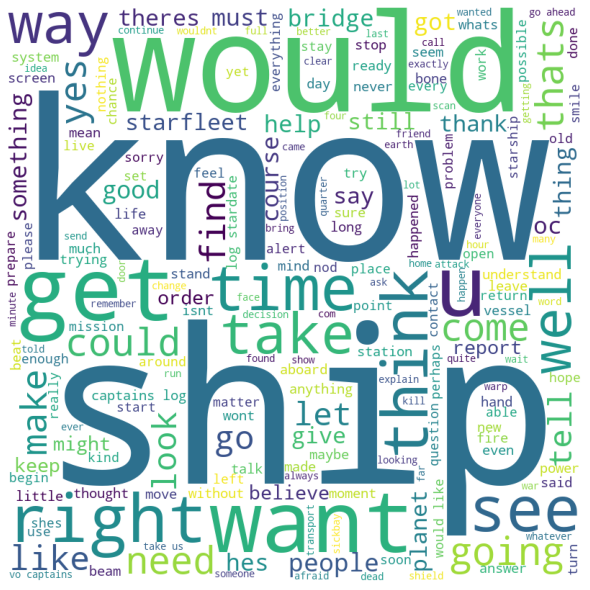

In [252]:
comment_words = ''

for captain in  ['SISKO', 'JANEWAY', 'KIRK', 'PICARD', 'SARU', 'PIKE', 'LORCA', 
                'CAPTAIN FREEMAN', 'JIM KIRK', 'JL', 'JEAN LUC', 'JAMES KIRK',
                'COMMANDER SISKO', 'BENJAMIN SISKO', 'KATHRYN JANEWAY']:
    # iterate through the csv file
    for line in lf.loc[lf['name'] == captain]['quote']:
        # split the value
        tokens = re.sub(r'[^\w\s]', '', str(line)).lower().split()
        comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords | char_split | set(title_words) | set(not_lines),
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

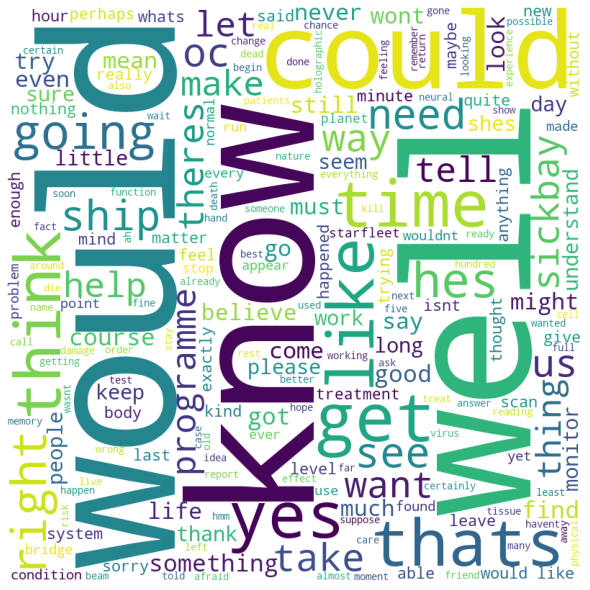

In [253]:
comment_words = ''

for doctor in  ['CRUSHER', 'PULASKI', 'MCCOY', 'CHAPEL', 'POLLAR', 
                'CULBER', 'TANA', 'TENDI', 'EMH', 'JULIAN BASHIR', 
                'JULIAN', 'ZIMMERMAN', 'AGNES']:
    # iterate through the csv file
    for line in lf.loc[lf['name'] == doctor]['quote']:
        # split the value
        tokens = re.sub(r'[^\w\s]', '', str(line)).lower().split()
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i]
        comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords | char_split | set(title_words) | set(not_lines),
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

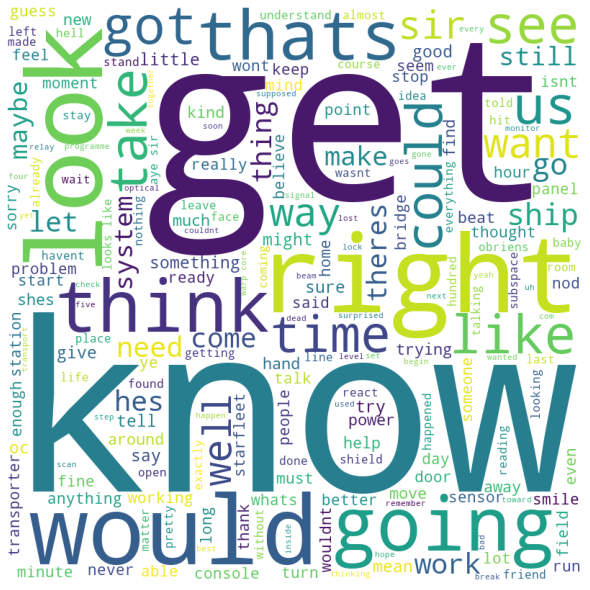

In [255]:
comment_words = ''

for engineer in  ['SCOTTY', 'MONTGOMERY SCOTT', 'MONTGOMERY SCOTTY', 'LA FORGE',
                'LT LA FORGE', 'GEORGI', 'RUTHERFORD', 'MILES', 'OBRIEN', 
                'MILES OBRIEN','CHEIF', 'TORRES', 'BELANA', 'BILLUPS']:
    # iterate through the csv file
    for line in lf.loc[lf['name'] == engineer]['quote']:
        # split the value
        tokens = re.sub(r'[^\w\s]', '', str(line)).lower().split()
        comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords | char_split | set(title_words) | set(not_lines),
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [256]:
lf['ep'] = lf['ep'].astype(int)

In [257]:
ratings['series'] = ratings['series'].fillna('The Original Series')
# ratings = ratings.dropna().reset_index()
lf = lf.merge(ratings, 
              left_on='ep',
              right_on='index',
              how='outer')

In [258]:
lf['sea'] = lf['ep_y'].str[2:4].replace(r'[^\w\s]', '')
lf['in_sea'] = lf['ep_y'].str[6:8].replace(r'[^\w\s]', '')
lf['series'] = lf['series'].str.replace(r'[^\w\s]', '').str.replace('_', ' ')
lf = lf.drop('ep_y', axis=1)
lf = lf.rename(columns={'ep_x' : 'id'})

In [259]:
lf.to_csv('partial.csv')

In [260]:
for ep in np.unique(lf['id']):
    date = lf.loc[lf['id'] ==0]['stardate']
    if len(date.value_counts()) > 0:
        lf.loc[lf['id'] == 0]['stardate'] = date.value_counts().index[0]

In [261]:
for i in ['DEEP SPACE', 'STAR TREK', 'FADE', 'USS']:
    lf = lf.loc[lf['name'] != i].reset_index(drop=True)

In [262]:
lf = lf[['quote', 'id', 'name', 'stardate', 'title', 
         'desc', 'wk_aud_scr', 'wk_tmt', 'wk_aud_cnt', 
         'wk_tmt_cnt', 'series', 'sea', 'in_sea']]

In [42]:
lf.to_csv('lf.csv')
# lf = pd.read_csv('lf.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'lf.csv'

In [269]:
# feature generation using intensity analyzer 
analyzer = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
lf['pol'] = ''
for i in range(len(lf)):
    new = []
    words = word_tokenize(lf.at[i, 'quote'])
    for w in words:
        if  w in stopwords:
            pass
        elif w in char_split:
            pass
        elif w.isnumeric() == True:
            pass
        elif w in not_lines:
            pass
        elif w in title_words:
            pass
        else: 
            new.append(lemmatizer.lemmatize(w))
    lf.at[i, 'quote'] = ' '.join(new)
    lf.at[i, 'pol'] = analyzer.polarity_scores(' '.join(new))
    for h in ['neg', 'neu', 'pos']:
        lf.at[i, h] = float(lf['pol'][i][h])

In [326]:
lf['wk_aud_scr'] = lf['wk_aud_scr'].str.strip('%').astype(float)

In [400]:
lf.columns

Index(['Unnamed: 0', 'quote', 'id', 'name', 'stardate', 'title', 'desc',
       'wk_aud_scr', 'wk_tmt', 'wk_aud_cnt', 'wk_tmt_cnt', 'series', 'sea',
       'in_sea', 'pol', 'neg', 'neu', 'pos'],
      dtype='object')

In [398]:
negativity_vs_score = {}
empty_dict = {'Neg':[], 
              'Score':[]}
seriess = [x for x in lf.series.value_counts().index]
for series in seriess:
    negativity_vs_score[series] = empty_dict
    neg = lf.loc[lf['series'] == series].copy().groupby('id').mean()['length']
    scr = lf.loc[lf['series'] == series].copy().groupby('id').mean()['wk_aud_scr']
    for value in neg:
        if str(value).isnumeric():
            negativity_vs_score[series]['Neg'].append(value)
    for value in scr:
        if str(value).isnumeric():
            negativity_vs_score[series]['Score'].append(value)

KeyError: 'length'

TypeError: float() argument must be a string or a number, not 'dict'

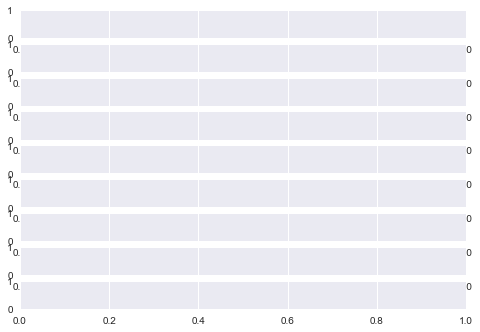

In [399]:
fig, axs = plt.subplots(9)
transformer = MaxAbsScaler()
seriess = [x for x in lf.series.value_counts().index]
transformer.fit(pd.DataFrame(lf.groupby('id').mean()['neg']))
for i in range(len(seriess)):
    axs[i].plot(pd.DataFrame(transformer.transform(negativity_vs_score[seriess.pop(0)])))

In [287]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.style.use('seaborn') 
# ccplot = lf['neg'].plot(kind='line',  x='publisher_y', figsize=(12,8), color='maroon', linestyle='dashed', linewidth=1.75, alpha=.75)
cplot = lf.plot(kind='bar', x='neg', figsize=(12,8), position=-0.1, stacked=True, colormap='RdYlGn')#, ax=ccplot, alpha=.75)

x = np.linspace(0, 1*np.pi, 100)
y = np.sin(x)

cplot.plot(x, y, 'k-', lw=0)
cplot.axvspan(0.0, 4.5, color='g', alpha=0.3)


cplot.set_title('Who Should You Send Your Movies To?'.format('seaborn'), color='maroon', fontsize=17)
cplot.set_xlabel(xlabel='Major Critic Publications' .format('seaborn'), color='maroon', fontsize=12)
cplot.set_ylabel(ylabel='Reviews In Thousands'.format('seaborn'), color='darkolivegreen', fontsize=12)
cplot.set_facecolor(color='honeydew')
cplot.axes.yaxis.grid(b=True, which='Both', color='darkolivegreen', linestyle='-', linewidth=.5)
cplot.axes.xaxis.grid(b=False)


cplot.tick_params(axis='x', colors='maroon')
cplot.tick_params(axis='y', colors='darkolivegreen')

plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x000001D4D35556A8> (for post_execute):


KeyboardInterrupt: 

## Initial model 

In [976]:
X_train, X_test, y_train, y_test = train_test_split(combined, 
                                                    scr.to_frame(), 
                                                    test_size=0.33, 
                                                    random_state=42)
initial_test = make_ols(X_test, y_test, True)
# assign your predictions 
y_pred_train = initial_test.predict(X_train)
y_pred_test = initial_test.predict(X_test)
# then get the scores:
train_mse_train = mean_squared_error(y_train, y_pred_train)
test_mse_test = mean_squared_error(y_test, y_pred_test)
# print em 
print(f'Training Mean Squared Error: {train_mse_train}')
print(f'Testing Mean Squared Error: {test_mse_test}')

## Feature Engineering & dimensionality reduction

In [972]:
dfn, stack, feature_labels, series = get_sentiment_an(combined)

In [973]:
stk = pd.DataFrame(stack.toarray(), 
                   columns=feature_labels)
# Create correlation matrix
corr_matrix = stk.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                  k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [col for col in upper.columns if any(upper[col] > 0.75)]

while len(to_drop) > 0:
    # Drop features 
    stk.drop(labels = to_drop.pop(0),
             axis = 1,
             inplace = True)
    corr_matrix = stk.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                                      k=1).astype(np.bool))
    to_drop = [col for col in upper.columns if any(upper[col] > 0.75)]

In [974]:
vifs = getVIF(stk)
labels = [x for x in vifs.loc[vifs['VIF'] > 5]['feature']]
while len(labels) > 0:
    stk.drop(labels = labels.pop(0), axis = 1, inplace = True)
    vifs = getVIF(stk)
    labels = [x for x in vifs.loc[vifs['VIF'] > 5]['feature']]

In [975]:
if len(stk.columns) > 100:
    svd = TruncatedSVD(n_components=100, 
                       n_iter=15, 
                       random_state=42)
    pca = svd.fit_transform(stk)
    pca = pd.DataFrame(pca)
    pca.to_csv('pca.csv')
else:
    pca = stk

In [983]:
pvals = model_test.pvalues.to_frame()

while sum(pvals[0] > .05) > 0:
    for i in pvals.index:
        if pvals.at[i, 0] > .05:
            pca = pca.drop(labels=i, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(pca, scr, 
                                                            test_size=0.33,
                                                            random_state=42)
        model_test = make_ols(X_test, 
                              y_test, 
                              False)
        pvals = model_test.pvalues.to_frame()

In [990]:
X_train, X_test, y_train, y_test = train_test_split(pca, scr,
                                                    test_size=0.33,
                                                    random_state=42)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             wk_aud_scr   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              30.38
Date:                Tue, 29 Jun 2021   Prob (F-statistic):                    3.72e-56
Time:                        15:54:56   Log-Likelihood:                          458.33
No. Observations:                 255   AIC:                                     -872.7
Df Residuals:                     233   BIC:                                     -794.8
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
anything      -0.0599      0.019     -3.224      0.001      -0.097      -0.023
feel           0.0440      0.016      2.728      0.007       0.012       0.076
hand          -0.0450      0.021     -2.162      0.032      -0.086      -0.004
he             0.0588      0.023      2.532      0.012       0.013       0.105
like          -0.0694      0.022     -3.113      0.002      -0.113      -0.025
mind           0.0517      0.019      2.738      0.007       0.015       0.089
minute         0.0753      0.037      2.010      0.046       0.002       0.149
problem       -0.0581      0.020     -2.896      0.004      -0.098      -0.019
remember       0.0554      0.019      2.885      0.004       0.018       0.093
run            0.0726      0.015      4.723      0.000       0.042       0.103
seem           0.0598      0.019      3.168      0.002       0.023       0.097
shield        -0.0606      0.020     -3.043      0.003      -0.100      -0.021
sir            0.0390      0.017      2.244      0.026       0.005       0.073
sure           0.0417      0.021      1.980      0.049       0.000       0.083
taking        -0.0624      0.019     -3.254      0.001      -0.100      -0.025
think         -0.1329      0.050     -2.675      0.008      -0.231      -0.035
toward         0.2720      0.062      4.394      0.000       0.150       0.394
twenty        -0.0579      0.022     -2.576      0.011      -0.102      -0.014
wanted        -0.0377      0.015     -2.457      0.015      -0.068      -0.007
wouldnt        0.1307      0.048      2.748      0.006       0.037       0.224
year           0.0806      0.019      4.294      0.000       0.044       0.118
pos            0.0717      0.019      3.726      0.000       0.034       0.110
==============================================================================
Omnibus:                       76.765   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.482
Skew:                           1.288   Prob(JB):                     1.64e-52
Kurtosis:                       6.976   Cond. No.                         16.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\anaconda3\envs\trek-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Training Mean Squared Error: 0.005315039578446859
Testing Mean Squared Error: 0.0016082398334513264


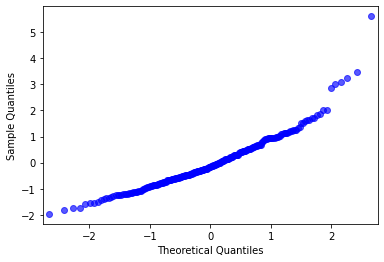

In [991]:
final_test = make_ols(X_test, y_test, True)
# assign your predictions 
y_pred_train = final_test.predict(X_train)
y_pred_test = final_test.predict(X_test)
# then get the scores:
train_mse_train = mean_squared_error(y_train, y_pred_train)
test_mse_test = mean_squared_error(y_test, y_pred_test)
# print em 
print(f'Training Mean Squared Error: {train_mse_train}')
print(f'Testing Mean Squared Error: {test_mse_test}')

## Interpret

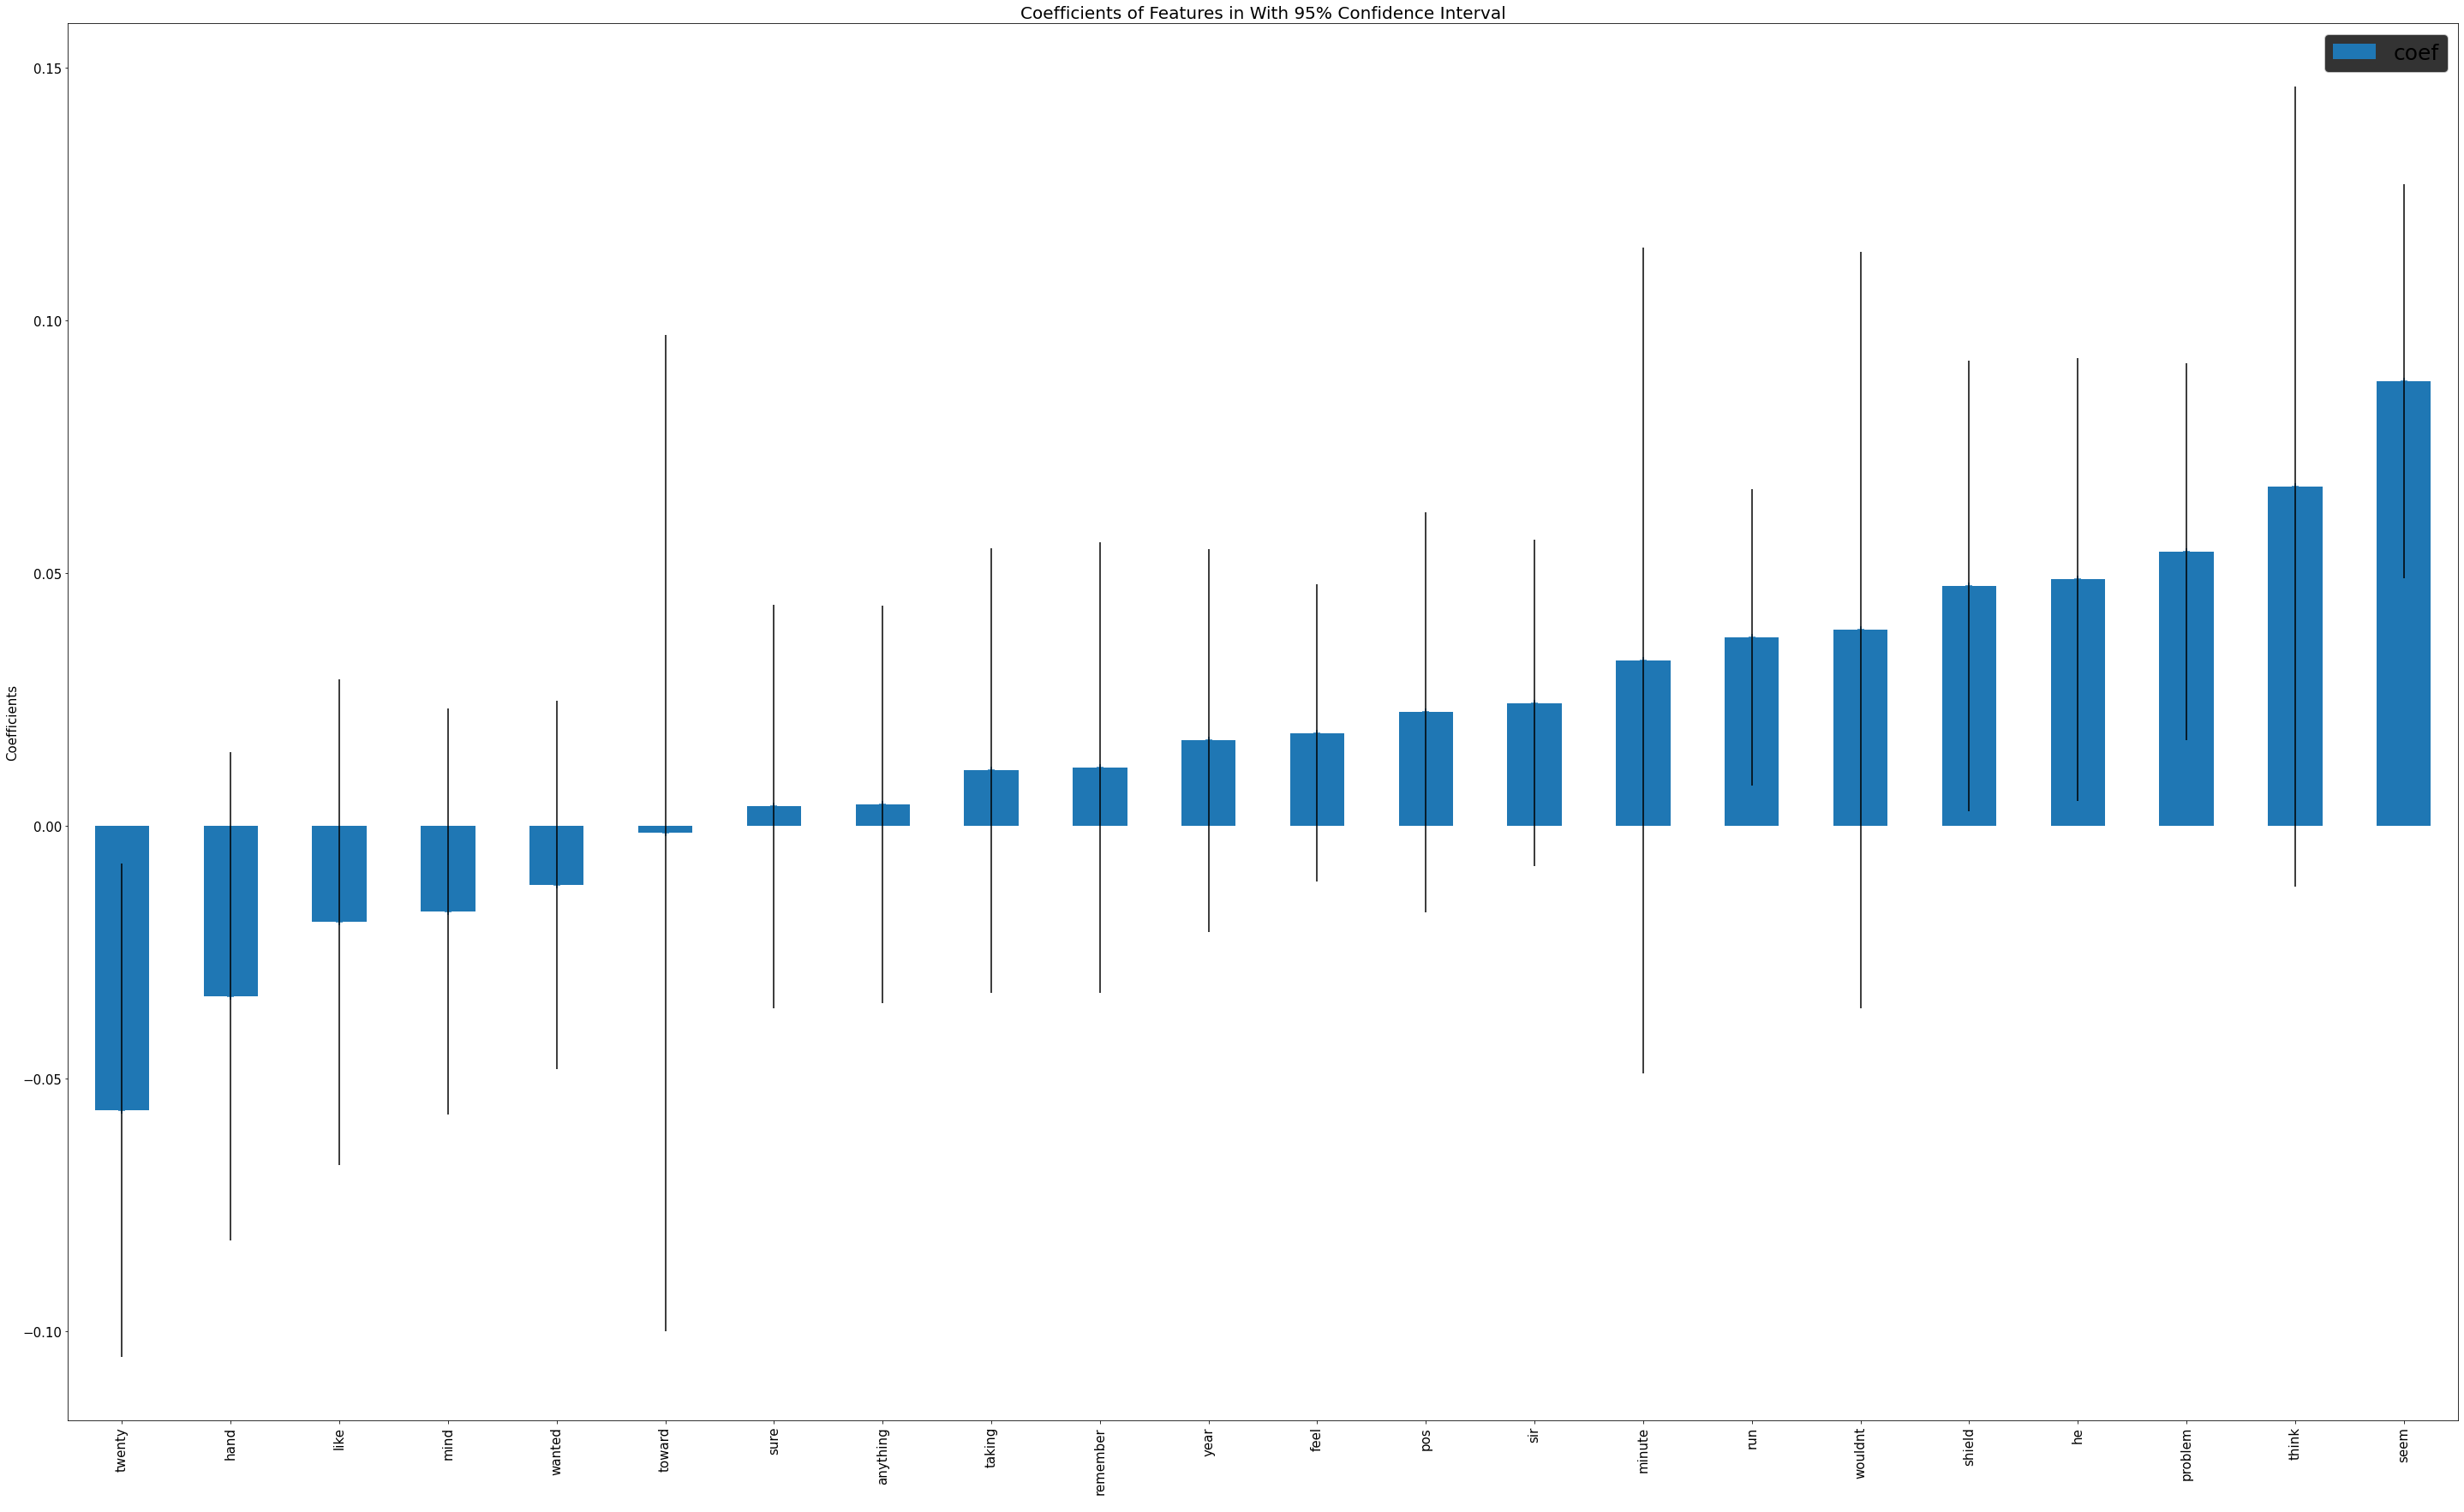

In [993]:
plotcoef(final_test)

## Future Work 

In [ ]:
Get a collection of viewership/ratings/reviews for each individual epsiode and movie.
Continue to collect data and train models on ratings for future episodes and films.
Build chatbots for each main character of the franchise. 
Incorporate novels, games & alternate Star Trek media to add more depth to universe. 
Train on larger dataset to ensure the most variety. 